# Tarea 14, MySQL en Python con al menos 2 cambios
## Universidad de Guadalajara, CUCEA
## Maestría en Ciencia de los Datos
## Programación I

### Javier Pérez Cajita, 325057392

In [1]:
# Importamos las librerías necesarias:
# - mysql.connector para conectarnos a MySQL
# - pandas para manejar los resultados en forma de DataFrame
# - ipywidgets y display para crear la interfaz gráfica en Jupyter
import mysql.connector
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

In [2]:
# Cargamos el archivo MaratonNY.csv desde la ruta indicada
carreras = pd.read_csv("C:/Users/perez/Desktop/SEMESTRE1/ClasePython/Sesion13/MaratonNY.csv")

# Mostramos las primeras filas para verificar que se cargó correctamente
carreras.head()

,Corredor,place,gender,age,home,time
0,3475,3592,Male,52,GBR,217.483333
1,13594,13853,Female,40,NY,272.550000
2,12012,12256,Male,31,FRA,265.283333
3,10236,10457,Female,33,MI,256.150000
4,9476,9686,Male,33,NY,252.250000


# Conexión con MySQL

In [3]:
import mysql.connector

conexion = mysql.connector.connect(
    host="localhost",
    user="root",
    password="MCD.PerezCajita",  
    database="db_mysql"           
)
cursor = conexion.cursor()
print("Conexión exitosa")

Conexión exitosa


In [16]:
# Usamos directamente el CSV en lugar de la base de datos
df = pd.read_csv("C:/Users/perez/Desktop/SEMESTRE1/ClasePython/Sesion13/MaratonNY.csv")

# Convertimos 'time' a numérico una sola vez
df['time'] = pd.to_numeric(df['time'], errors='coerce')

print("Datos cargados desde CSV:", df.shape)
df.head()

Datos cargados desde CSV: (1000, 6)


,Corredor,place,gender,age,home,time
0,3475,3592,Male,52,GBR,217.483333
1,13594,13853,Female,40,NY,272.550000
2,12012,12256,Male,31,FRA,265.283333
3,10236,10457,Female,33,MI,256.150000
4,9476,9686,Male,33,NY,252.250000


In [17]:

import ipywidgets as widgets
from IPython.display import display

# Sliders para filtros
edad_min = widgets.IntSlider(value=30, min=18, max=80, step=1, description='Edad mínima:')
edad_max = widgets.IntSlider(value=50, min=18, max=80, step=1, description='Edad máxima:')
tiempo_max = widgets.FloatSlider(value=250.0, min=100.0, max=400.0, step=1.0, description='Tiempo máximo:')

In [18]:
# Dropdown para género
genero = widgets.Dropdown(
    options=['Todos', 'M', 'F'],
    value='Todos',
    description='Género:'
)

In [19]:
def filtrar(edad_min, edad_max, tiempo_max, genero):
    # Convertimos 'time' a numérico una sola vez
    df['time'] = pd.to_numeric(df['time'], errors='coerce')
    
    # Aplicamos filtros usando las columnas correctas
    filtro = df[
        (df['age'] >= edad_min) &
        (df['age'] <= edad_max) &
        (df['time'] <= tiempo_max)
    ]
    
    # Filtro adicional por género
    if genero != 'Todos':
        filtro = filtro[filtro['gender'] == genero]
    
    # Mostramos hasta 20 resultados
    display(filtro.head(20))

In [20]:
widgets.interact(
    filtrar,
    edad_min=edad_min,
    edad_max=edad_max,
    tiempo_max=tiempo_max,
    genero=genero
)

interactive(children=(IntSlider(value=30, description='Edad mínima:', max=80, min=18), IntSlider(value=50, des…

<function __main__.filtrar(edad_min, edad_max, tiempo_max, genero)>

In [21]:
widgets.interact(
    filtrar,
    edad_min=edad_min,
    edad_max=edad_max,
    tiempo_max=tiempo_max,
    genero=genero
)

interactive(children=(IntSlider(value=30, description='Edad mínima:', max=80, min=18), IntSlider(value=50, des…

<function __main__.filtrar(edad_min, edad_max, tiempo_max, genero)>

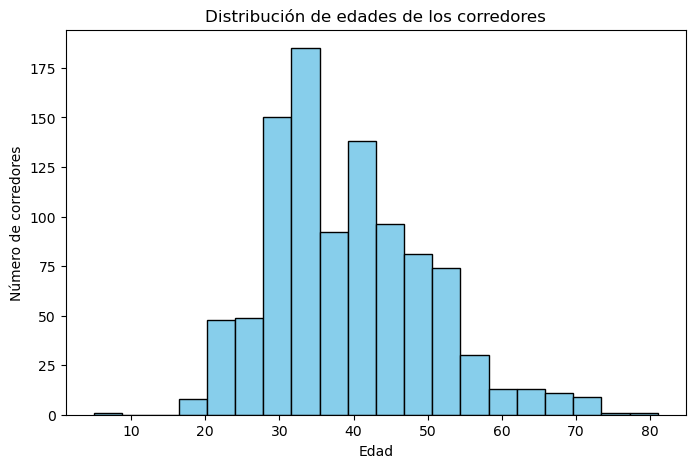

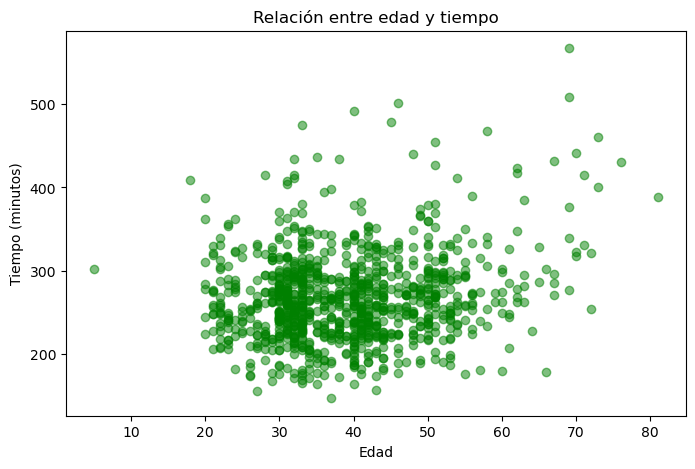

In [22]:
import matplotlib.pyplot as plt

# Histograma de la distribución de edades
plt.figure(figsize=(8,5))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribución de edades de los corredores")
plt.xlabel("Edad")
plt.ylabel("Número de corredores")
plt.show()

# Gráfico de dispersión edad vs tiempo
plt.figure(figsize=(8,5))
plt.scatter(df['age'], df['time'], alpha=0.5, color='green')
plt.title("Relación entre edad y tiempo")
plt.xlabel("Edad")
plt.ylabel("Tiempo (minutos)")
plt.show()

## Visualización de los datos

Después de implementar los filtros interactivos con `widgets.interact`, se añadieron **gráficas** para enriquecer el análisis de los corredores:

### Histograma de edades
- Muestra la **distribución de edades** de todos los corredores.
- Permite identificar rangos de edad más frecuentes en la maratón.
- Se utiliza `plt.hist()` con 20 intervalos (bins) para mayor detalle.

### Gráfico de dispersión (edad vs tiempo)
- Representa la relación entre la **edad** y el **tiempo de carrera**.
- Cada punto corresponde a un corredor.
- Permite observar tendencias: por ejemplo, si los tiempos aumentan con la edad.
- Se utiliza `plt.scatter()` con transparencia (`alpha=0.5`) para evitar saturación visual.
